<a href="https://colab.research.google.com/github/vedkkaria-beep/Python-Project/blob/main/IPL_Auction_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
match=pd.read_csv('matches.csv')
delivery=pd.read_csv('deliveries.csv')

In [ ]:
# Top 5 batters in the last 3 seasons
last_3_seasons = sorted(matches["season"].unique())[-3:]
merged = deliveries.merge(matches[["id", "season"]], left_on="match_id", right_on="id")
filtered = merged[merged["season"].isin(last_3_seasons)]
runs_by_batter = filtered.groupby("batter")["batsman_runs"].sum()
top_5 = runs_by_batter.sort_values(ascending=False).head(5)
print("Top 5 Batters in the Last 3 Seasons:")
print(top_5)

Top 5 Batters in the Last 3 Seasons:
batter
Shubman Gill    1799
V Kohli         1721
F du Plessis    1636
JC Buttler      1614
RD Gaikwad      1541
Name: batsman_runs, dtype: int64


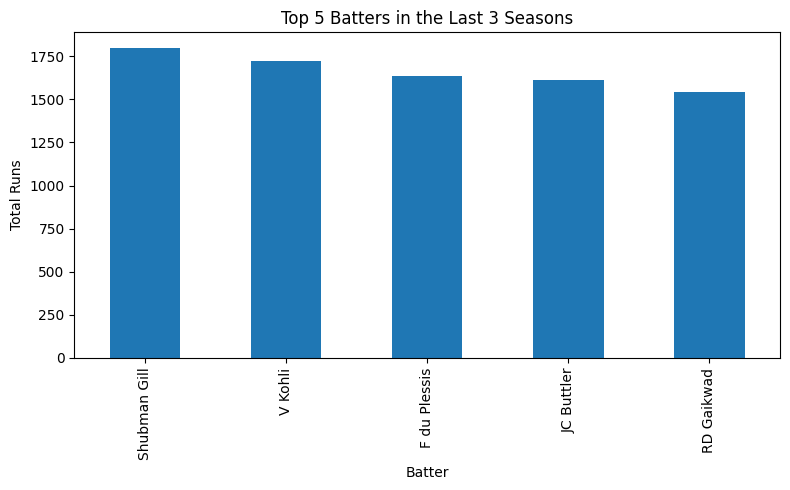

In [ ]:
plt.figure(figsize=(8, 5))
top_5.plot(kind="bar")
plt.title("Top 5 Batters in the Last 3 Seasons")
plt.xlabel("Batter")
plt.ylabel("Total Runs")
plt.tight_layout()
plt.show()

In [ ]:
#Top 5 bowlers in the last 3 seasons
last_3_seasons = sorted(matches["season"].unique())[-3:]
merged = deliveries.merge(matches[["id", "season"]],left_on="match_id",right_on="id")
filtered = merged[merged["season"].isin(last_3_seasons)]
valid_wickets = ["caught", "bowled", "lbw", "stumped","caught and bowled", "hit wicket"]
icket_data = filtered[filtered["dismissal_kind"].isin(valid_wickets)]
bowlers = wicket_data["bowler"].values
unique_bowlers, wicket_counts = np.unique(bowlers, return_counts=True)
df = pd.DataFrame({"bowler": unique_bowlers,"wickets": wicket_counts})
top_5 = df.sort_values(by="wickets", ascending=False).head(5)
print("Top 5 Bowlers in the Last 3 Seasons:")
print(top_5)

Top 5 Bowlers in the Last 3 Seasons:
             bowler  wickets
168       YS Chahal       66
45         HV Patel       57
132     Rashid Khan       56
96   Mohammed Shami       48
27         CV Varun       47


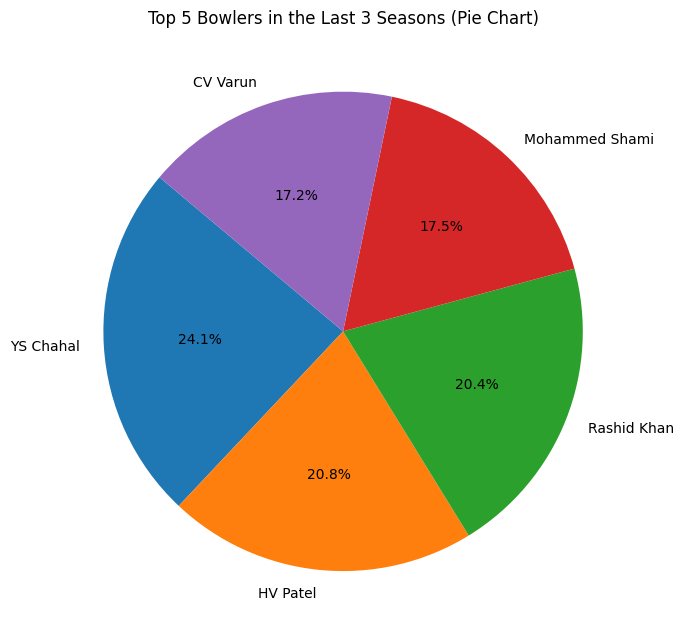

In [ ]:
plt.figure(figsize=(7, 7))
plt.pie(
    top_5["wickets"],
    labels=top_5["bowler"],
    autopct="%1.1f%%",
    startangle=140
)
plt.title("Top 5 Bowlers in the Last 3 Seasons (Pie Chart)")
plt.tight_layout()
plt.show()

In [ ]:
# Player rankings based on performance metrics
batting = deliveries.groupby("batter").agg(
    runs_scored = ("batsman_runs", "sum"),
    balls_faced = ("ball", "count")
).reset_index()
batting["strike_rate"] = (batting["runs_scored"] / batting["balls_faced"]) * 100
bowling = deliveries.groupby("bowler").agg(
    wickets = ("is_wicket", "sum"),
    runs_conceded = ("total_runs", "sum"),
    balls_bowled = ("ball", "count")
).reset_index()
bowling["economy"] = bowling["runs_conceded"] / (bowling["balls_bowled"] / 6)
batting.columns = ["player", "runs_scored", "balls_faced", "strike_rate"]
bowling.columns = ["player", "wickets", "runs_conceded", "balls_bowled", "economy"]
players = pd.merge(batting, bowling, on="player", how="outer").fillna(0)
players["batting_score"]  = (
    players["runs_scored"] * 0.05 +
    players["strike_rate"] * 0.2)
players["bowling_score"] = (
    players["wickets"] * 2 -
    players["economy"] * 0.5)
players["all_rounder_score"] = (
    players["batting_score"] + players["bowling_score"]
)
players["rank"] = players["all_rounder_score"].rank(ascending=False)
ranked_players = players.sort_values("rank").reset_index(drop=True)
print("Top Player Rankings Based on Performance Metrics:\n")
print(ranked_players[["rank", "player", "batting_score", "bowling_score", "all_rounder_score"]].head(20))

Top Player Rankings Based on Performance Metrics:

    rank           player  batting_score  bowling_score  all_rounder_score
0    1.0         DJ Bravo     103.020048     409.962379         512.982427
1    2.0        RA Jadeja     172.836459     334.212837         507.049296
2    3.0        SP Narine     107.878862     396.619392         504.498254
3    4.0         R Ashwin      62.922636     392.515281         455.437917
4    5.0        PP Chawla      52.717241     398.011040         450.728281
5    6.0        YS Chahal      10.164607     422.129272         432.293879
6    7.0          V Kohli     426.402373       5.784091         432.186464
7    8.0        SR Watson     220.832642     210.150679         430.983320
8    9.0          B Kumar      33.406509     386.267734         419.674243
9   10.0       AD Russell     157.244884     245.441558         402.686443
10  11.0         A Mishra      36.368182     362.347561         398.715743
11  12.0       SL Malinga      21.487379     372.